 # **1. Understanding the dataset**
 
 This is an initial exploration of the dataset. It shows the number of entries, columns, datatypes etc. It is really useful to locate the columns with many null values. It gives me a good idea of which columns I will use and which ones I will drop. Also, I can detect some main trends  and possible errors in the data.
 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/raw/drug_deaths.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           5105 non-null   int64  
 1   ID                   5105 non-null   object 
 2   Date                 5103 non-null   object 
 3   DateType             5103 non-null   float64
 4   Age                  5102 non-null   float64
 5   Sex                  5099 non-null   object 
 6   Race                 5092 non-null   object 
 7   ResidenceCity        4932 non-null   object 
 8   ResidenceCounty      4308 non-null   object 
 9   ResidenceState       3556 non-null   object 
 10  DeathCity            5100 non-null   object 
 11  DeathCounty          4005 non-null   object 
 12  Location             5081 non-null   object 
 13  LocationifOther      590 non-null    object 
 14  DescriptionofInjury  4325 non-null   object 
 15  InjuryPlace          5039 non-null   o

In [2]:
df.head()

,Unnamed: 0,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,0,14-0273,06/28/2014 12:00:00 AM,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,0,0,Accident,"CT\r\n(41.575155, -72.738288)","CT\r\n(41.575155, -72.738288)","CT\r\n(41.575155, -72.738288)"
1,1,13-0102,03/21/2013 12:00:00 AM,0.0,48.0,Male,Black,NORWALK,NaN,NaN,...,0,0,0,NaN,0,0,Accident,"Norwalk, CT\r\n(41.11805, -73.412906)","NORWALK, CT\r\n(41.11805, -73.412906)","CT\r\n(41.575155, -72.738288)"
2,2,16-0165,03/13/2016 12:00:00 AM,0.0,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,...,0,0,0,NaN,0,1,Accident,"Danbury, CT\r\n(41.393666, -73.451539)","SANDY HOOK, CT\r\n(41.419998, -73.282501)",NaN
3,3,16-0208,03/31/2016 12:00:00 AM,0.0,23.0,Male,White,RYE,WESTCHESTER,NY,...,0,0,0,NaN,0,1,Accident,"Greenwich, CT\r\n(41.026526, -73.628549)",NaN,NaN
4,4,13-0052,02/13/2013 12:00:00 AM,0.0,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,...,0,0,0,NaN,0,0,Accident,"Greenwich, CT\r\n(41.026526, -73.628549)",NaN,"CT\r\n(41.575155, -72.738288)"


In [3]:
df.columns

Index(['Unnamed: 0', 'ID', 'Date', 'DateType', 'Age', 'Sex', 'Race',
       'ResidenceCity', 'ResidenceCounty', 'ResidenceState', 'DeathCity',
       'DeathCounty', 'Location', 'LocationifOther', 'DescriptionofInjury',
       'InjuryPlace', 'InjuryCity', 'InjuryCounty', 'InjuryState', 'COD',
       'OtherSignifican', 'Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl_Analogue',
       'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine',
       'Methadone', 'Amphet', 'Tramad', 'Morphine_NotHeroin', 'Hydromorphone',
       'Other', 'OpiateNOS', 'AnyOpioid', 'MannerofDeath', 'DeathCityGeo',
       'ResidenceCityGeo', 'InjuryCityGeo'],
      dtype='object')

In [4]:
df.nunique(axis=0)

Unnamed: 0             5105
ID                     5105
Date                   2098
DateType                  2
Age                      65
Sex                       3
Race                     11
ResidenceCity           370
ResidenceCounty          84
ResidenceState           26
DeathCity               222
DeathCounty               9
Location                  6
LocationifOther         322
DescriptionofInjury     320
InjuryPlace              71
InjuryCity              234
InjuryCounty             12
InjuryState               3
COD                    3193
OtherSignifican          92
Heroin                    2
Cocaine                   2
Fentanyl                  5
Fentanyl_Analogue         2
Oxycodone                 2
Oxymorphone               2
Ethanol                   2
Hydrocodone               2
Benzodiazepine            2
Methadone                 2
Amphet                    2
Tramad                    2
Morphine_NotHeroin        6
Hydromorphone             2
Other               

In [5]:
df.describe()

,Unnamed: 0,DateType,Age,Heroin,Cocaine,Fentanyl_Analogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Hydromorphone,OpiateNOS
count,5105.000000,5103.000000,5102.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000
mean,2552.000000,0.446992,41.964916,0.495397,0.297943,0.076200,0.118903,0.021156,0.244270,0.023115,0.263075,0.092850,0.031146,0.025465,0.004897,0.017238
std,1473.830893,0.497231,12.336639,0.500028,0.457399,0.265344,0.323706,0.143917,0.429696,0.150282,0.440346,0.290251,0.173729,0.157549,0.069815,0.130170
min,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1276.000000,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2552.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3828.000000,1.000000,52.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5104.000000,1.000000,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **2. Cleaning the data**
After the initial exploration, I decided to drop some columns and keep the ones that are useful for the analysis. Since I want to see some trends in age, gender, race, and substance related to the deaths, I kept these columns.  I built a function to drop the columns that I do not need and to drop also the ones with too many null values. Using this function, I also changed the datatype of all drugs to int 64. Initially I noticed that some drugs columns that should be int or float datatype were object datatype. After some exploration of these columns, I found some values that were not 1 or 0. I dropped these rows too. Also, I dropped all null values remaining, changed the date datatype and renamed some columns. 

In [6]:
from scripts import project_functions
df1 = project_functions.load_and_process('../data/raw/drug_deaths.csv')
df1.head()

,ID,Date,Age,Sex,Race,COD,Heroin,Cocaine,Fentanyl,Fentanyl_Analogue,...,Hydrocodone,Benzodiazepine,Methadone,Amphetamine,Tramadol,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid,MannerofDeath
1,13-0102,2013-03-21,48,Male,Black,Cocaine Intoxication,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Accident
2,16-0165,2016-03-13,30,Female,White,Acute Heroin and Cocaine Intoxication,1,1,0,0,...,0,0,0,0,0,0,0,0,1,Accident
3,16-0208,2016-03-31,23,Male,White,Acute Fentanyl and Morphine Intoxication,1,0,1,0,...,0,0,0,0,0,0,0,0,1,Accident
4,13-0052,2013-02-13,22,Male,"Asian, Other",Fentanyl Intoxication,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Accident
5,14-0277,2014-06-29,23,Male,White,Heroin Intoxication,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Accident


# **3. Visualization**
In this section through visualization I can analyse some relationships between variables.


This is the new information and the summary of some statistics for the dataset after cleaning the data.

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5067 entries, 1 to 5104
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  5067 non-null   object        
 1   Date                5067 non-null   datetime64[ns]
 2   Age                 5067 non-null   int64         
 3   Sex                 5067 non-null   object        
 4   Race                5067 non-null   object        
 5   COD                 5067 non-null   object        
 6   Heroin              5067 non-null   int64         
 7   Cocaine             5067 non-null   int64         
 8   Fentanyl            5067 non-null   int64         
 9   Fentanyl_Analogue   5067 non-null   int64         
 10  Oxycodone           5067 non-null   int64         
 11  Oxymorphone         5067 non-null   int64         
 12  Ethanol             5067 non-null   int64         
 13  Hydrocodone         5067 non-null   int64       

In [8]:
df1.describe()

,Age,Heroin,Cocaine,Fentanyl,Fentanyl_Analogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphetamine,Tramadol,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid
count,5067.000000,5067.000000,5067.000000,5067.000000,5067.000000,5067.000000,5067.000000,5067.000000,5067.000000,5067.000000,5067.000000,5067.000000,5067.000000,5067.000000,5067.000000,5067.000000,5067.000000
mean,41.908427,0.497336,0.297415,0.437734,0.076574,0.119005,0.021117,0.244326,0.022893,0.262483,0.093152,0.031182,0.025656,0.007500,0.004934,0.016973,0.482731
std,12.319919,0.500042,0.457166,0.496157,0.265940,0.323827,0.143789,0.429729,0.149578,0.440027,0.290674,0.173827,0.158123,0.086283,0.070075,0.129181,0.499751
min,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
#import pandas_profiling as pp 
import ydata_profiling as pp
pp.ProfileReport(df1) 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

This report was generated using the cleaned data. From the pandas profiling  I can see that the data is clean, with only one variable 'COD'(Cause of death) flagged for high cardinality. I included this variable because it shows a more ample description of the cause of death. I used this variable for a general visualization of the cause of death. The report also shows a general dsitribution of the variables; the more interesting variables to analyse are: date, age, race, sex, and all the different drugs. 

C:\Users\Bibiana\AppData\Local\Temp\ipykernel_16552\4226851273.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1.corr()


Text(0.5, 1.0, 'Drug overdose deaths Correlation matrix')

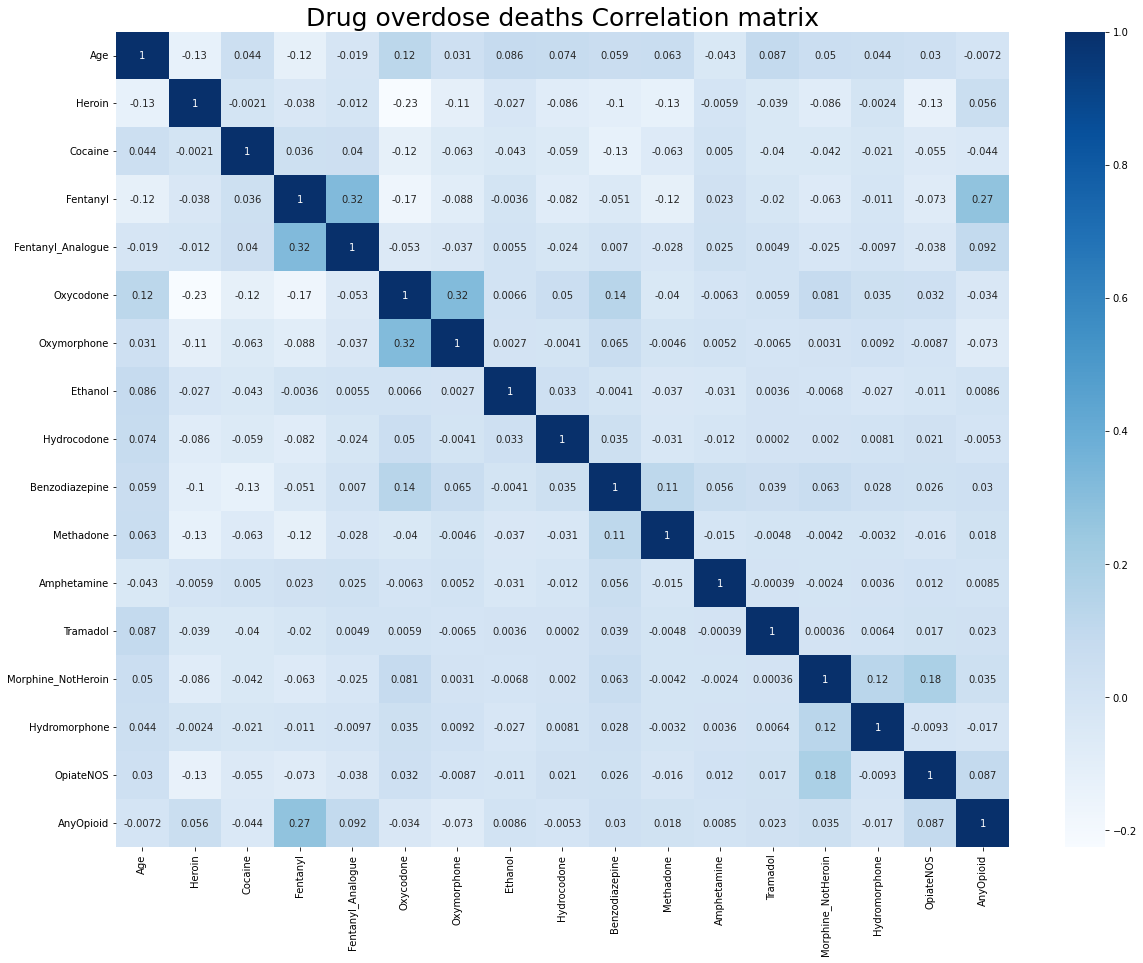

In [13]:
corr = df1.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr, cmap="Blues", annot=True)
plt.title('Drug overdose deaths Correlation matrix', fontsize=25)

This heatmap includes the coefficients to have a better idea of the correlation. By observing the coefficients the heatmap does not show a strong correlation between variables. 

Text(0.5, 0, 'Count of cases')

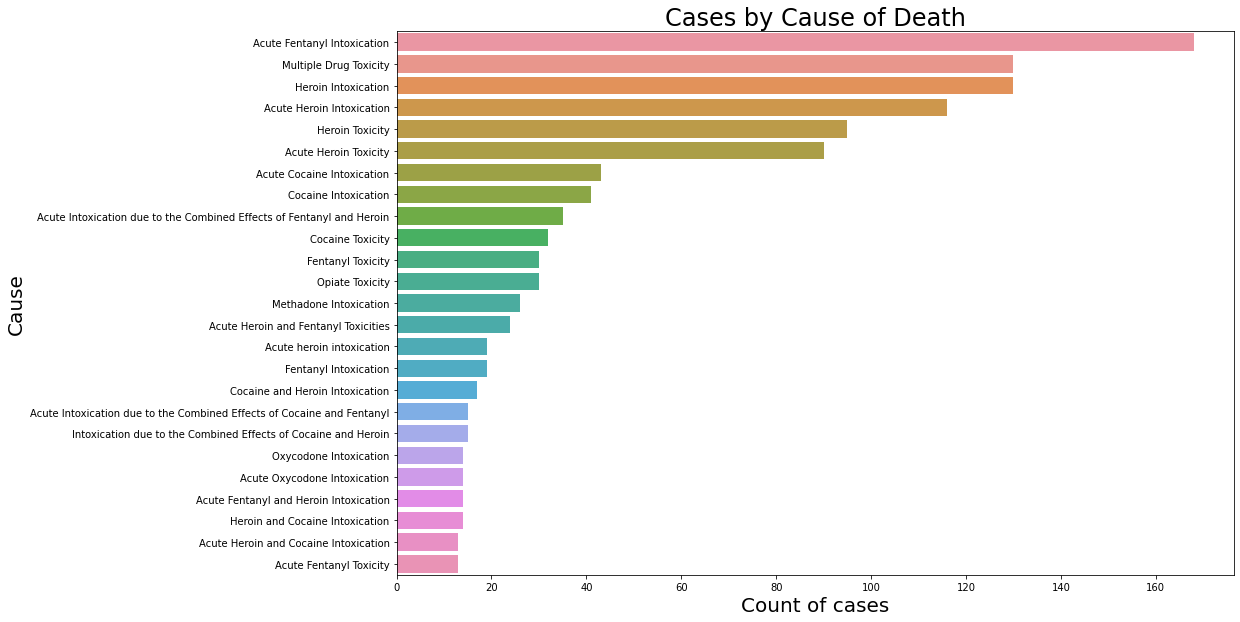

In [11]:
plt.figure(figsize=[15,10])
sns.countplot(y=df1["COD"], order=df1["COD"].value_counts().index[:25])
plt.title("Cases by Cause of Death", fontsize=24)
plt.ylabel("Cause", fontsize=20)
plt.xlabel("Count of cases", fontsize=20)


Even though the overview shows that the variable 'COD'(Cause of death) has high cardinality, it gives a general idea of which substances are the most associated with drug overdose. This graph shows that the 2 more frequent drugs associated to deaths are Fentanyl and Heroin.